In [0]:
A MNIST-like fashion product database
In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

Load tensorflow

In [0]:
import tensorflow as tf
tf.set_random_seed(42)
import numpy as np
import pandas as pd
tf.reset_default_graph()

In [453]:
tf.__version__

'1.14.0'

Collect Data

In [0]:
import keras

In [0]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [456]:
print(testY[0:5])

[9 2 1 1 6]


In [457]:
trainX.shape

(60000, 28, 28)

In [458]:
trainY.shape

(60000,)

In [459]:
print(trainX[0:1])
print(trainX.shape)

[[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73
     0   0   1   4   0   0   0   0   1   1   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127
    62  54   0   0   0   1   3   4   0   0   3]
  [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176
   134 144 123  23   0   0   0   0  12  10   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207
   178 107 156 161 109  64  23  77 130  72  15]
  [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218
   216 216 163 127 121 122 146 141  88 172  66]
  [  0   0   0   0   0   0   0   0   0   1   1  

Convert both training and testing labels into one-hot vectors.

Hint: check tf.keras.utils.to_categorical()

In [0]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

In [461]:
trainY.shape

(60000, 10)

In [462]:
trainX.shape

(60000, 28, 28)

In [463]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Visualize the data
Plot first 10 images in the training set and their labels.

In [0]:
import matplotlib.pyplot as plt

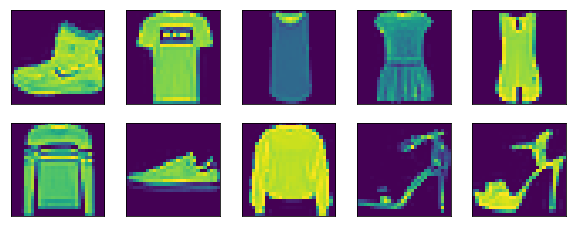

In [465]:
fig = plt.figure(figsize=(10,10))
for i in range(10):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(trainX[i])

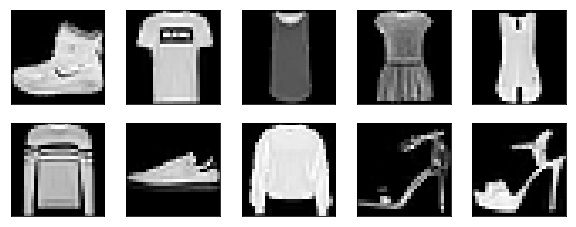

In [466]:
fig = plt.figure(figsize=(10,10))
for i in range(10):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(trainX[i], cmap = "gray")

 Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))


#Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', 
              metrics=['accuracy'])

Execute the model using model.fit()

In [468]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY),epochs=30,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 2s 40us/sample - loss: 2010.6400 - acc: 0.7400 - val_loss: 1980.2994 - val_acc: 0.7642
Epoch 2/30
60000/60000 [==============================] - 2s 40us/sample - loss: 1654.3032 - acc: 0.7767 - val_loss: 1292.8508 - val_acc: 0.8125
Epoch 3/30
60000/60000 [==============================] - 2s 40us/sample - loss: 1580.6545 - acc: 0.7856 - val_loss: 1287.3200 - val_acc: 0.8105
Epoch 4/30
60000/60000 [==============================] - 2s 40us/sample - loss: 1484.8114 - acc: 0.7905 - val_loss: 1561.9660 - val_acc: 0.7548
Epoch 5/30
60000/60000 [==============================] - 2s 39us/sample - loss: 1489.3201 - acc: 0.7916 - val_loss: 1129.6308 - val_acc: 0.8113
Epoch 6/30
60000/60000 [==============================] - 2s 39us/sample - loss: 1467.2638 - acc: 0.7946 - val_loss: 1056.1233 - val_acc: 0.8250
Epoch 7/30
60000/60000 [==============================] - 2s 40us/sample - loss:

In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.


In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))


#Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', 
              metrics=['accuracy'])#Normalize the data

model.add(tf.keras.layers.BatchNormalization())

Execute the model

In [470]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
              epochs=30,
              batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 51us/sample - loss: 9.6395 - acc: 0.1001 - val_loss: 9.6709 - val_acc: 0.1000
Epoch 2/30
60000/60000 [==============================] - 3s 50us/sample - loss: 9.6709 - acc: 0.1000 - val_loss: 9.6709 - val_acc: 0.1000
Epoch 3/30
60000/60000 [==============================] - 3s 49us/sample - loss: 9.6709 - acc: 0.1000 - val_loss: 9.6709 - val_acc: 0.1000
Epoch 4/30
60000/60000 [==============================] - 3s 49us/sample - loss: 9.6709 - acc: 0.1000 - val_loss: 9.6709 - val_acc: 0.1000
Epoch 5/30
60000/60000 [==============================] - 3s 50us/sample - loss: 9.6709 - acc: 0.1000 - val_loss: 9.6709 - val_acc: 0.1000
Epoch 6/30
60000/60000 [==============================] - 3s 49us/sample - loss: 9.6709 - acc: 0.1000 - val_loss: 9.6709 - val_acc: 0.1000
Epoch 7/30
60000/60000 [==============================] - 3s 49us/sample - loss: 9.6709 - acc: 0.1000 - val_loss: 9.

Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))


#Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', 
              metrics=['accuracy'])#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

sgd_optimizer = tf.keras.optimizers.SGD(lr=0.001)

model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [472]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=30,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 52us/sample - loss: 8.0673 - acc: 0.0999 - val_loss: 8.0590 - val_acc: 0.1000
Epoch 2/30
60000/60000 [==============================] - 3s 49us/sample - loss: 8.0545 - acc: 0.1000 - val_loss: 8.0623 - val_acc: 0.1000
Epoch 3/30
60000/60000 [==============================] - 3s 48us/sample - loss: 8.0626 - acc: 0.1001 - val_loss: 8.0607 - val_acc: 0.1000
Epoch 4/30
60000/60000 [==============================] - 3s 49us/sample - loss: 8.0618 - acc: 0.1001 - val_loss: 8.0607 - val_acc: 0.1000
Epoch 5/30
60000/60000 [==============================] - 3s 49us/sample - loss: 8.0607 - acc: 0.0999 - val_loss: 8.0607 - val_acc: 0.1000
Epoch 6/30
60000/60000 [==============================] - 3s 49us/sample - loss: 8.0604 - acc: 0.1000 - val_loss: 8.0607 - val_acc: 0.1000
Epoch 7/30
60000/60000 [==============================] - 3s 53us/sample - loss: 8.0617 - acc: 0.1001 - val_loss: 8.

Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.


In [0]:
#Initialize Sequential model
model3 = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model3.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))


#Add Dense Layer which provides 10 Outputs after applying softmax
model3.add(tf.keras.layers.Dense(10, activation='softmax'))

#Compile the model
model3.compile(optimizer='sgd', loss='categorical_crossentropy', 
              metrics=['accuracy'])#Normalize the data
model3.add(tf.keras.layers.BatchNormalization())

#Add 1st hidden layer
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))

#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))

#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)

model3.compile(optimizer=sgd_optimizer, loss='mse')

In [474]:
model3.fit(trainX,trainY,          
          epochs=30,
          batch_size=32)

Epoch 1/30
60000/60000 [==============================] - 3s 47us/sample - loss: 0.0929
Epoch 2/30
60000/60000 [==============================] - 2s 41us/sample - loss: 0.0900
Epoch 3/30
60000/60000 [==============================] - 3s 42us/sample - loss: 0.0900
Epoch 4/30
60000/60000 [==============================] - 2s 42us/sample - loss: 0.0900
Epoch 5/30
60000/60000 [==============================] - 2s 41us/sample - loss: 0.0900
Epoch 6/30
60000/60000 [==============================] - 2s 41us/sample - loss: 0.0900
Epoch 7/30
60000/60000 [==============================] - 3s 42us/sample - loss: 0.0900
Epoch 8/30
60000/60000 [==============================] - 3s 42us/sample - loss: 0.0900
Epoch 9/30
60000/60000 [==============================] - 2s 42us/sample - loss: 0.0900
Epoch 10/30
60000/60000 [==============================] - 3s 42us/sample - loss: 0.0900
Epoch 11/30
60000/60000 [==============================] - 3s 42us/sample - loss: 0.0900
Epoch 12/30
60000/60000 [=====

Customize the learning rate to 0.001 in sgd optimizer and run the model

Review model

In [475]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_3 (Reshape)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                7850      
_________________________________________________________________
batch_normalization_2 (Batch (None, 10)                40        
Total params: 7,890
Trainable params: 7,870
Non-trainable params: 20
_________________________________________________________________


Run the Model

In [476]:
model3.evaluate(testX,testY)

10000/10000 [==============================] - 0s 30us/sample - loss: 0.0900


0.09000800728797913

In [480]:
testX[0:1].shape

(1, 28, 28)

In [481]:
model.input

<tf.Tensor 'reshape_2_input:0' shape=(?, 28, 28) dtype=float32>

In [482]:
np.expand_dims(testX[0], axis=0).shape

(1, 28, 28)

In [485]:
#Actual Label in test dataset
print(testY[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [487]:
#Model prediction
prediction = model.predict(testX[0:1])

#Print prediction
print(prediction)

[[0.23633377 0.0200574  0.05456273 0.04214601 0.03781205 0.03804402
  0.04600449 0.04834292 0.05966553 0.41703105]]


In [488]:
#Get predicted number with highest probability
predicted_num = np.argmax(prediction[0])

#Print the number
print(predicted_num)

9


In [489]:
testY[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

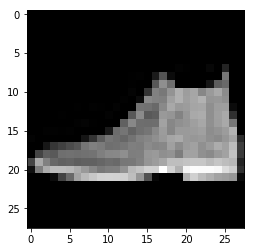

In [490]:
#Lets print the image as well
import matplotlib.pyplot as plt

plt.imshow(testX[0],cmap='gray')